In [1]:
file_name_au = "nts.mu2e.CeEndpointOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001210_00000339.root"
from pyutils.pyprocess import Processor
processor = Processor(use_remote=True, location="disk")
branches=["trksegs"]
data = processor.process_data(file_name_au, branches=branches)

[pyutils] ⭐️ Setting up...
[pyutils] ✅ Ready
[pyprocess] ⭐️ Initialised Processor:
	path = 'EventNtuple/ntuple'
	use_remote = True
	location = disk
	schema = root
	verbosity=1
[pyprocess] ✅ Completed process on nts.mu2e.CeEndpointOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001210_00000339.root


In [10]:
import awkward as ak
from pyutils.pyvector import Vector
momv = Vector().get_vector(data["trksegs"], "mom")

[pyvector] ⭐️ Initialised Vector with verbosity = 1
[pyvector] ✅ Created 3D 'mom' vector


In [13]:
import numpy as np
mom_T = np.sqrt(momv["x"]**2 + momv["y"]**2)
mom_T = ak.flatten(mom_T, axis=None)

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


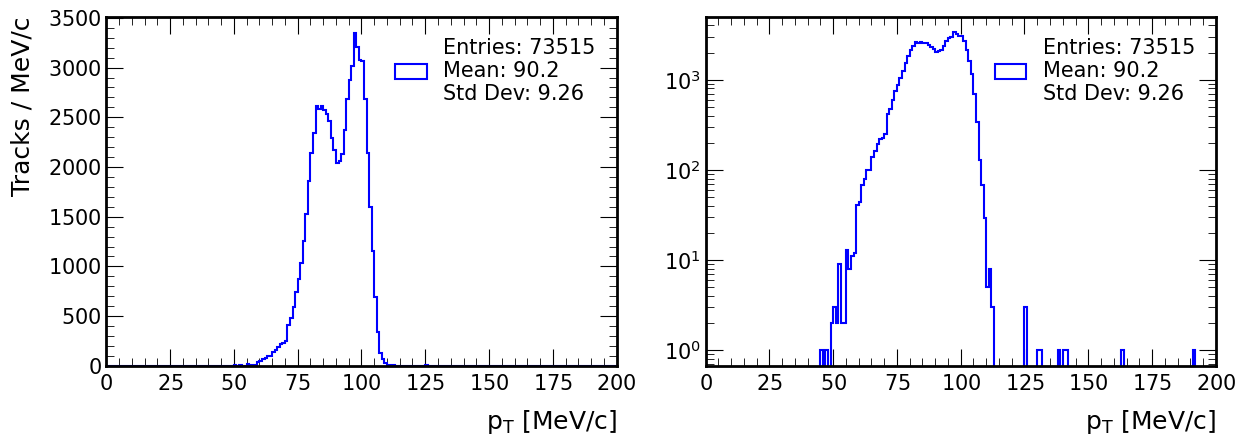

Wrote ../../output/images/dev/h1_1x2_mom_T_au_single.png


In [20]:
import matplotlib.pyplot as plt 
from pyutils.pyplot import Plot
plotter = Plot() 
fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 4.8))
plotter.plot_1D(mom_T, nbins=200, xmin=0, xmax=200, col="blue", log_y=False, xlabel=r"$p_{T}$ [MeV/c]", ylabel = "Tracks / MeV/c", ax=ax[0], show=False)
plotter.plot_1D(mom_T, nbins=200, xmin=0, xmax=200, col="blue", log_y=True, xlabel=r"$p_{T}$ [MeV/c]", ax=ax[1], show=False)
plt.tight_layout()
out_path="../../output/images/dev/h1_1x2_mom_T_au_single.png"
plt.savefig(out_path, dpi=300)
plt.show()
print(f"Wrote {out_path}")